$\textbf{\large{Use the code cells below for Exercise 1.}}$




$\textbf{\large{The next code cell finds the derivative of a function.}}$

In [147]:
#import packages
import sympy as sp
import numpy as np

# Define the input variable
x = sp.Symbol('x')

# Define the function
f = sp.exp(x)+sp.exp(-2*x)
print("Function:", f)

# Take the derivative
f_prime = sp.diff(f, x)
print("Derivative:", f_prime)

Function: exp(x) + exp(-2*x)
Derivative: exp(x) - 2*exp(-2*x)


$\textbf{\large{The next code cell finds the input values where the output of the derivative function is equal to zero.}}$

$\textbf{\large{In other words it solves the equation,} f'(x) = 0.}$

In [148]:
#import packages
from sympy import symbols, Eq, solve

# define input variable
x = symbols('x')
# define equation to solve
equation = Eq(sp.exp(x) - 2*sp.exp(-2*x), 0)

# ask python to solve this equation
solutions = solve(equation, x)

# print solution
print(solutions)

[log(2**(1/3)) - 2*I*pi/3, log(2**(1/3)) + 2*I*pi/3, log(2**(1/3))]


$\textbf{\large{Use the next code cell to evaluate the derivative function at the test points.}}$

$\textbf{\large{This is more reliable than using a calculator.}}$

In [149]:
# define a python function to evaluate the derivative at test points
def derivative_func(x):
    return 3*x**2 - 12*x #change this to match the derivative function


test_pt_1 = -1#left of 0
value_1 = derivative_func(test_pt_1)
print(value_1)

15


$\textbf{\large{Use the next code cell to graph the original function.}}$

$\textbf{\large{Use the code cells below for Exercise 2.}}$


$\textbf{\large{Exercise 2.c.iv: The next code cell simplifies the expression from Exercise 2.c.iii}}$

In [150]:
#import packages
import sympy as sp

#define the input variable m
m = sp.symbols('m')

#fill in the expression you got in Exercise 2.C.iii
expr = (1/6)*((3.4-m*1)**2+(7.6-m*2)**2+(6.7-m*3)**2+(8.3-m*4)**2+(10.5-m*5)**2+(9.3-m*6)**2)

#have python simplify the expression for you
print("Simplified:", sp.simplify(expr))

Simplified: 15.1666666666667*m**2 - 60.0666666666667*m + 63.3066666666667


$\textbf{\large{Exercise 2.c.v: The next code cell finds the derivative C'(m).}}$

In [151]:
#import packages
import sympy as sp
import numpy as np

# Define the input variable
m = sp.Symbol('m')

# Define the function
c = 15.1666666666667*m**2 - 60.0666666666667*m + 63.3066666666667
print("Function:", c)

# Take the derivative
c_prime = sp.diff(c, m)
print("Derivative:", c_prime)

Function: 15.1666666666667*m**2 - 60.0666666666667*m + 63.3066666666667
Derivative: 30.3333333333334*m - 60.0666666666667


$\textbf{\large{Exercise 2.c.vi: The next code cell solves the equation C'(m) = 0.}}$

In [152]:
#import packages
from sympy import symbols, Eq, solve

# define input variable
m = symbols('m')
# define equation to solve
equation = Eq(30.3333333333334*m - 60.0666666666667, 0)

# ask python to solve this equation
solutions = solve(equation, m)

# print solution
print(solutions)

[1.98021978021978]


$\textbf{\large{Exercise 2.c.vii: The next code cell plots the cost function.}}$

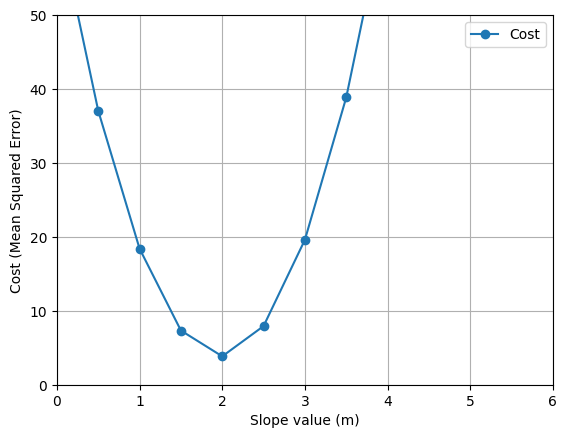

In [153]:
#import packages
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------
# Observed data: advertising dollars vs. sales revenue
# ---------------------------------------------
dollars_spent = np.array([1, 2, 3, 4,5,6])
sales_revenue = np.array([3.4,7.6,6.7,8.3,10.5,9.3])

# ---------------------------------------------
# Step 1: Create a range of possible slope values (our model parameters)
# ---------------------------------------------
# We'll test slope values from 0 to 5 in steps of 0.5
slope_choices = np.arange(0, 5.5, 0.5)

# ---------------------------------------------
# Step 2: Generate predictions for each slope
# ---------------------------------------------
# Each slope defines a line:  ŷ = m * x
# We compute predicted y-values for each slope and each data point
predictions = slope_choices[:, np.newaxis] * dollars_spent

# ---------------------------------------------
# Step 3: Compute the cost for each slope
# ---------------------------------------------
# We'll use Mean Squared Error (MSE):
#     Cost = (1/n) * Σ (y - ŷ)²
cost = (1 / len(sales_revenue)) * np.sum((sales_revenue - predictions) ** 2, axis=1)

# ---------------------------------------------
# Step 4: Plot the cost function
# ---------------------------------------------
plt.plot(slope_choices, cost, marker="o", label="Cost")
plt.xlabel("Slope value (m)")
plt.ylabel("Cost (Mean Squared Error)")
plt.xlim([0, 6])
plt.ylim([0, 50])
plt.grid(True)
plt.legend()
plt.show()


$\textbf{\large{Exercise 2.c.ix: The next code cell helps carry out gradient descent.}}$

In [154]:
# ---------------------------------------------
# Observed data: advertising dollars vs. sales revenue
# DO NOT CHANGE
# ---------------------------------------------
dollars_spent = np.array([1, 2, 3, 4,5,6])
sales_revenue = np.array([3.4,7.6,6.7,8.3,10.5,9.3])

# ---------------------------------------------
# Define Python Functions to Use
# DO NOT CHANGE
# ---------------------------------------------
# make a function to compute the MSE
def cost_func(m,input_vals,output_vals):
    return (1/len(output_vals))*np.sum((output_vals-m*input_vals)**2)
#make a function to compute the gradient at each choice of m
def gradient_func(m):
    return 30.3333333333334*m - 60.0666666666667

# ---------------------------------------------
# YOU set the learning rate
# CHANGE ONCE
# ---------------------------------------------
eta = .01
# ------------------------------------------------------------------------
# YOU change curr_m to carry out gradient descent, start with curr_m = m_0
# CHANGE MANY TIMES
# -------------------------------------------------------------------------
curr_m = -6
# ------------------------------------------------------------------------
# Dont change antyhing below here, just read the output
# DO NOT CHANGE
# -------------------------------------------------------------------------
#compute the cost for a given choice of m 
curr_cost = cost_func(curr_m,dollars_spent,sales_revenue)
#print the result
print("The cost for m = {} is {}.".format(curr_m,curr_cost))
#gradient at curr_m
gradient = gradient_func(curr_m)
print("The gradient at m = {} is {}.".format(curr_m,gradient))
#next m
next_m = curr_m-(gradient*eta)
print("The next guess for the slope is {}.".format(next_m))

The cost for m = -6 is 969.7066666666666.
The gradient at m = -6 is -242.0666666666671.
The next guess for the slope is -3.579333333333329.


$\textbf{\large{Use the code cells below for Exercise 3.}}$


$\textbf{\large{The next code cell carries out gradient descent.}}$

In [155]:
#---------------------------
# Define Python Functions to Use
# DO NOT CHANGE
# ---------------------------------------------
# make a function to compute the MSE
def cost_func(m,input_vals,output_vals):
    return 0.5*(m-3)**2 + 0.8*np.sin(3*m)
#make a function to compute the gradient at each choice of m
def gradient_func(m):
     return (m-3) + 2.4*np.cos(3*m)

# ---------------------------------------------
# YOU set the learning rate
# CHANGE ONCE
# ---------------------------------------------
eta = .1
# ------------------------------------------------------------------------
# YOU change curr_m to carry out gradient descent, start with curr_m = m_0
# CHANGE MANY TIMES
# -------------------------------------------------------------------------
curr_m = 70
# ------------------------------------------------------------------------
# Dont change antyhing below here, just read the output
# DO NOT CHANGE
# -------------------------------------------------------------------------
#compute the cost for a given choice of m 
curr_cost = cost_func(curr_m,dollars_spent,sales_revenue)
#print the result
print("The cost for m = {} is {}.".format(curr_m,curr_cost))
#gradient at curr_m
gradient = gradient_func(curr_m)
print("The gradient at m = {} is {}.".format(curr_m,gradient))
#next m
next_m = curr_m-(gradient*eta)
print("The next guess for the slope is {}.".format(next_m))

The cost for m = 70 is 2244.874174814674.
The gradient at m = 70 is 64.8786940643623.
The next guess for the slope is 63.51213059356377.
